### Problem : Predict whether the income of a person is >50K or <=50K
### Dataset : Adult Census dataset created by Barry Becker and Ronny Kohavi

In [1]:
!pip3 install ucimlrepo
!pip install imblearn

#### Libraries imported

In [2]:
from ucimlrepo import list_available_datasets, fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#### Importing Adult Census dataset from ucimlrepo

In [5]:
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Diagnostic)                                                    17    
Car Evaluation                 

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### Note : This particular dataset did not have a metadata file called "intro_paper" hence while trying to fetch the dataset the below error was thrown:

### Type Error : 'NoneType' object is not iterable.

### However, I resolved this by editing the code where the 'intropaper' metadata was accesed in the fetch.py of the ucimlrepo library file.

In [7]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [8]:
X.shape

(48842, 14)

In [9]:
y.shape

(48842, 1)

In [10]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [11]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


#### Combining the dataset for further analysis

In [4]:
adult_new=pd.DataFrame()
adult_new=X
adult_new['income']=y 

In [13]:
adult_new.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


### Descriptive analysis of the dataset

In [5]:
adult_new.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
adult_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Note: there are nine categorical(including 'income') and six continuous columns 

In [16]:
adult_new.isnull().sum() # checkign for null values in each collumn

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [17]:
adult_new.isin(['?']).sum() # checking for '?' values

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [18]:
adult_new['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

#### Finding the unique occurance of values in each collumn to identify any discrepancies in the data consistency

In [19]:
for name, val in adult_new.iteritems():
    print('{}: {}'.format(name,val.unique())+"\n")

age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

fnlwgt: [ 77516  83311 215646 ... 173449  89686 350977]

education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-suppor

#### We can see that there are various missing values in the form of nan and '?'in the below mentioned collumns: 
#### native-country
#### occupation
#### workclass
#### we will hence be handling these values 
#### also - the target variable 'income' has 4 values instead of the expected 2- will handle this as well

In [6]:
#cleaning income variable - since this is a binary categorical variable 
#we will replace values denoting '>50k.' as '>50k' and '<=50k.' as '<=50k'

adult_new['income'].replace({'<=50K.':'<=50K','>50K.':'>50K'},inplace=True)

#### EDA : Exploring the data distribution of each attributes to derive insights about the data

In [6]:
inc=adult_new['income'].value_counts(normalize=True)
inc*100

<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64

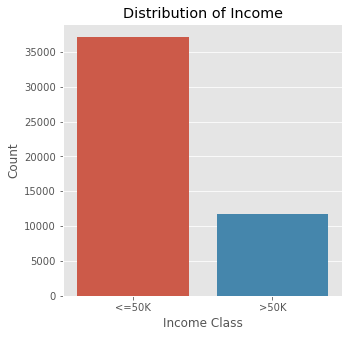

In [39]:
# Visualizing income collumn distribution
inc=adult_new['income'].value_counts()
plt.figure(figsize=(5,5))
plt.title("Distribution of Income")
plt.xlabel("Income Class")
plt.ylabel("Count")
sns.barplot(inc.index,inc.values)
plt.savefig("incomeDistr.jpg")
plt.show()

In [23]:
# Visualizing Age column distribution 

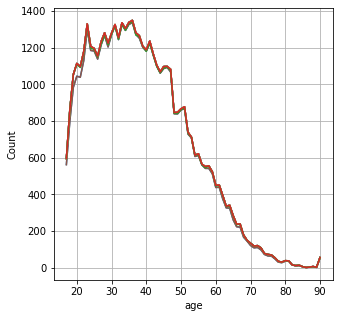

In [24]:
age=[age for age, df in adult_new.groupby('age')]
plt.figure(figsize=(5,5))
plt.plot(age,(adult_new.groupby('age').count()).values)
plt.xlabel("age")
plt.ylabel("Count")
plt.grid()
plt.show()

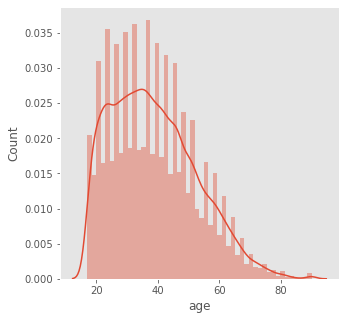

In [40]:
plt.figure(figsize=(5,5))
sns.distplot(adult_new['age'])
plt.xlabel("age")
plt.ylabel("Count")
plt.grid()
plt.savefig("ageDistr.jpg")
plt.show()

In [26]:
# distribution of year of education

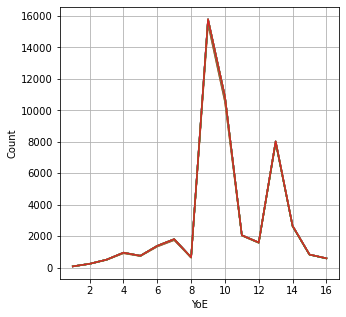

In [27]:
yoe=[yoe for yoe, df in adult_new.groupby('education-num')]
plt.figure(figsize=(5,5))
plt.plot(yoe,(adult_new.groupby('education-num').count()).values)
plt.xlabel("YoE")
plt.ylabel("Count")
plt.grid()
plt.show()

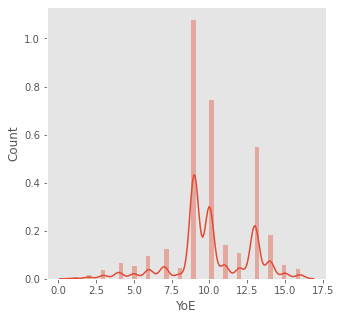

In [41]:
plt.figure(figsize=(5,5))
sns.distplot(adult_new['education-num'])
plt.xlabel("YoE")
plt.ylabel("Count")
plt.grid()
plt.savefig("YoeDistr.jpg")
plt.show()

In [29]:
# distribution of relationship


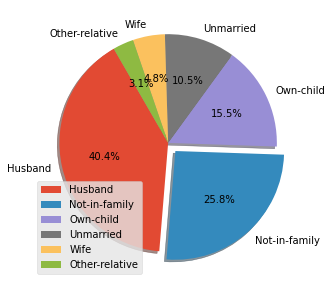

In [42]:
rel = adult_new['relationship'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(rel.values, labels=rel.index, explode=(0,0.1,0,0,0,0),shadow=True,startangle=120,autopct='%1.1f%%')
plt.legend(loc='best')
plt.savefig("RelationDistr.jpg")
plt.show()

In [31]:
# distribution of work hours per week 

In [32]:
time=adult_new['hours-per-week'].value_counts()
time

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
82        1
87        1
69        1
Name: hours-per-week, Length: 96, dtype: int64

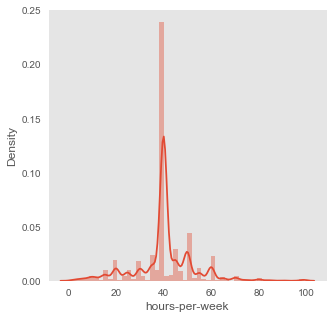

In [53]:
plt.figure(figsize=(5,5))
sns.distplot(adult_new['hours-per-week'])
plt.grid()
plt.savefig("hoursPWDistr.jpg")
plt.show()

In [34]:
# Education distribution

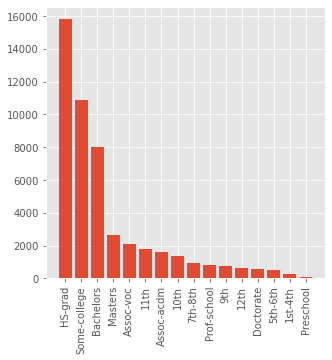

In [43]:
education = adult_new['education'].value_counts()
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
plt.bar(education.index, education.values)
plt.xticks(rotation='vertical')
plt.savefig("educationDistr.jpg")
plt.show()

In [36]:
# distribution of Sex

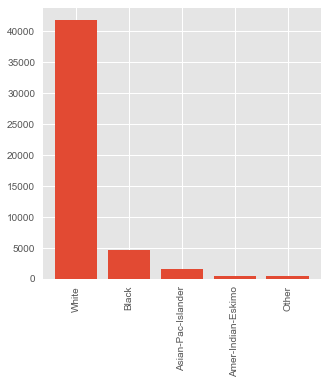

In [51]:
race=adult_new['race'].value_counts()
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
plt.bar(race.index, race.values)
plt.xticks(rotation='vertical')
plt.savefig("raceDistr.jpg")
plt.show()

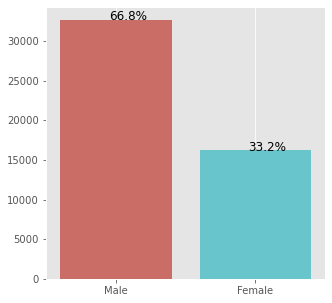

In [45]:
sex=adult_new['sex'].value_counts()
plt.figure(figsize=(5,5))
axs=sns.barplot(data=adult_new,x=sex.index,y=sex.values,palette="hls")
total = len(adult_new['sex'])
for p in axs.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    axs.annotate(percentage, (x, y), size = 12)
plt.grid()
plt.savefig("sexDstr.jpg")
plt.show()

##### Observations :
By observing the distributions of the above attributes in the dataset we observe that -
1. Most of the occurances in the dataset are white males aged between 20-40, high school graduates with around 8 - 10 years of experience and working for around 40 hours per week.
2. Around 67% male and 33% female.
3. The data needs to be sampled as the dataset is unbalanced. ie; since 76% data belongs to '<=50K' class and only 24% belongs to '>50K'

#### Analysing the relationship of different attributes to 'income' attribute

In [ ]:
# distribution of income  years of education and education

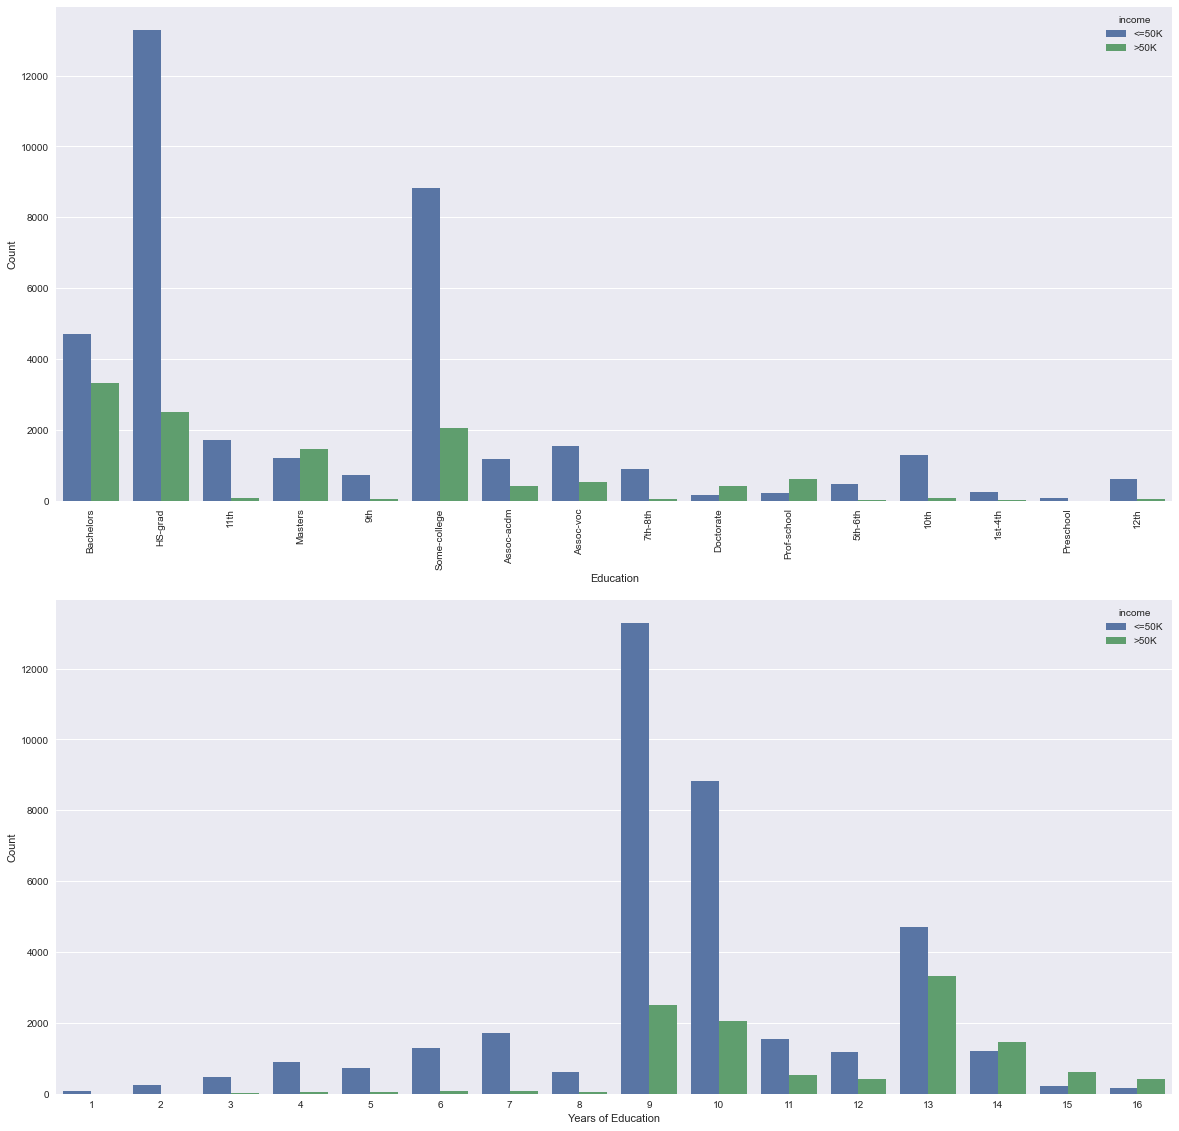

In [7]:
plt.figure(figsize=(20,20))
plt.style.use('seaborn')

plt.subplot(2,1,1)
sns.countplot(adult_new['education'], hue=adult_new['income'])
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation='vertical')

plt.subplot(2,1,2)
sns.countplot(adult_new['education-num'], hue=adult_new['income'])
plt.xlabel("Years of Education")
plt.ylabel("Count")

plt.savefig("incomeVEdu.jpg")
plt.show()

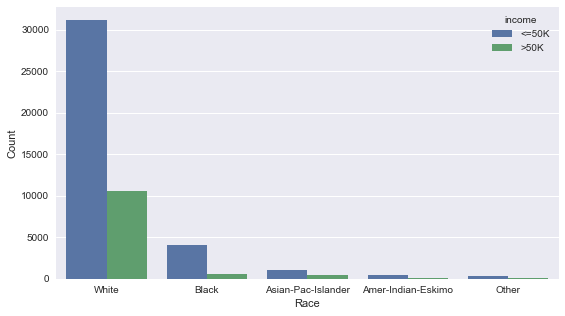

In [8]:
plt.figure(figsize=(9,5))
plt.style.use('seaborn')
sns.countplot(adult_new['race'], hue=adult_new['income'])
plt.xlabel("Race")
plt.ylabel("Count")
plt.savefig("incomeVrace.jpg")
plt.show()

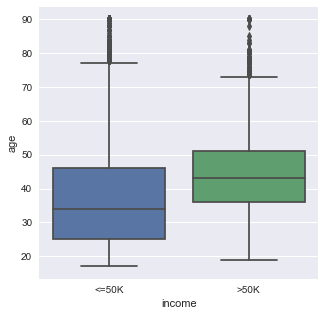

In [9]:
plt.figure(figsize=(5,5))
plt.style.use('seaborn')
sns.boxplot(x='income',y='age', data=adult_new)
plt.savefig("incomeVage.jpg")
plt.show()

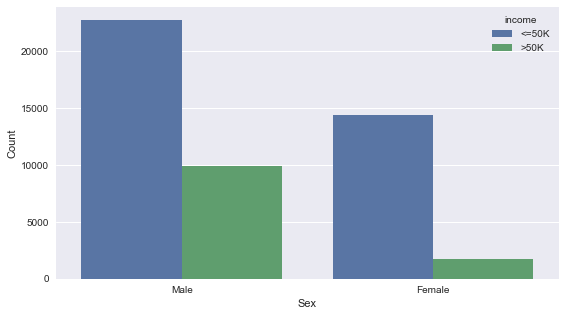

In [10]:
plt.figure(figsize=(9,5))
plt.style.use('seaborn')
sns.countplot(adult_new['sex'], hue=adult_new['income'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.savefig("incomeVSex.jpg")
plt.show()

In [12]:
adult_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


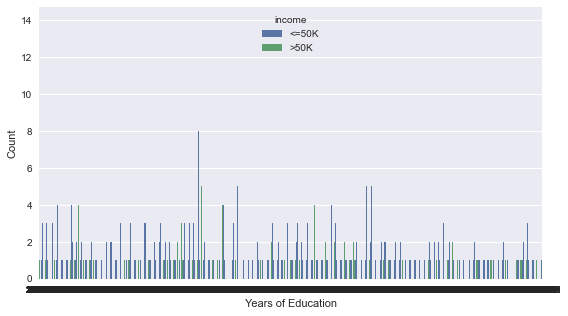

In [8]:
plt.figure(figsize=(9,5))
plt.style.use('seaborn')
sns.countplot(adult_new['fnlwgt'], hue=adult_new['income'])
plt.xlabel("Years of Education")
plt.ylabel("Count")
plt.show()

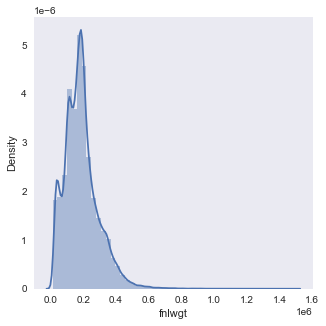

In [9]:
plt.figure(figsize=(5,5))
sns.distplot(adult_new['fnlwgt'])
plt.grid()
plt.show()

#### Data Pre Processing

In [10]:
adult_new.corr()
# inorder to understand the correlation of categorical variable 'income' with other variables will encode it to integer values

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [11]:

le= LabelEncoder()

adult_new['income']=le.fit_transform(adult_new['income'])

In [60]:
adult_new.corr()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.045643,-0.015058,0.030940,-0.263978,-0.000133,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002622,0.230369
workclass,0.045643,1.000000,0.005219,0.007333,-0.020870,0.009841,-0.056073,0.053923,0.066672,0.031558,0.004168,0.042845,-0.004829,-0.000511
education,-0.015058,0.005219,1.000000,0.359668,-0.037417,-0.035126,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.075339,0.080091
education-num,0.030940,0.007333,0.359668,1.000000,-0.069992,0.072706,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.090137,0.332613
marital-status,-0.263978,-0.020870,-0.037417,-0.069992,1.000000,0.030445,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.017919,-0.199072
occupation,-0.000133,0.009841,-0.035126,0.072706,0.030445,1.000000,-0.034964,-0.005210,0.042579,0.014518,0.011082,-0.015550,-0.001577,0.032550
relationship,-0.263383,-0.056073,-0.010758,-0.090534,0.187800,-0.034964,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.006999,-0.253214
race,0.028421,0.053923,0.013250,0.029239,-0.070104,-0.005210,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.117553,0.070934
sex,0.088120,0.066672,-0.027041,0.009328,-0.127479,0.042579,-0.579797,0.086734,1.000000,0.047094,0.045480,0.228560,-0.002453,0.214628
capital-gain,0.077229,0.031558,0.028928,0.125146,-0.043969,0.014518,-0.056510,0.011581,0.047094,1.000000,-0.031441,0.082157,0.007919,0.223013


#### Observation: 
1. Here we can observe that income has a negative correlation with collumn 'fnlwgt'. Hence making it redundant. Incomee has highest correlation with 'education-num' and 'age' respectively
2. Hence we can infer that 'fnlwgt' is a redundant feature here and can be dropped.



In [12]:
adult_new=adult_new.drop('fnlwgt',axis=1)

In [13]:
adult_new.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### Data Cleaning

In [14]:
adult_new.isnull().sum() # checkign for null values in each collumn

age                 0
workclass         963
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [15]:
adult_new.isin(['?']).sum() # checking for '?' values

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [16]:
# we will replace '?' with NaN and handle NaN
adult_new=adult_new.replace('?',np.nan)

In [17]:
adult_new.isnull().sum() # checkign for null values in each collumn

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [18]:
Nan_Cols=['workclass','occupation','native-country']
for col in Nan_Cols:
    adult_new[col].fillna(adult_new[col].mode()[0],inplace=True)
    
#Here we replace the null values with the most commonly occuring categories in each of these collumns

#### In this step, similar to how we encoded income feature for correlation and analysis we will encode the remanining categorical variables
#### and then we will go on to scale them. 

In [19]:
for col in adult_new.columns:
    if adult_new[col].dtypes == 'object':
        adult_new[col]=le.fit_transform(adult_new[col])

In [20]:
adult_new.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


#### Feature selection - We are going to be classifying the income class hence income is selected

In [21]:
X= adult_new.drop('income',axis=1)
y=adult_new['income']

In [22]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,9,13,2,3,0,4,1,0,0,13,38
2,38,3,11,9,0,5,1,4,1,0,0,40,38
3,53,3,1,7,2,5,0,2,1,0,0,40,38
4,28,3,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,9,13,0,9,1,4,0,0,0,36,38
48838,64,3,11,9,6,9,2,2,1,0,0,40,38
48839,38,3,9,13,2,9,0,4,1,0,0,50,38
48840,44,3,9,13,0,0,3,1,1,5455,0,40,38


#### Data Scaling 

In [23]:
minmax = MinMaxScaler()
for col in X.columns:
    X[col] = minmax.fit_transform(X[col].values.reshape(-1,1))

In [ ]:
X

In [24]:
round(y.value_counts(normalize=True) * 100) # As we had noted before, this dataset is imbalanced. Hence we will be sampling it  


0    76.0
1    24.0
Name: income, dtype: float64

In [25]:
smote= SMOTE() # using SMOTE oversampler to sample the data
smote.fit(X,y)

SMOTE()

In [26]:
X_sampled, y_sampled = smote.fit_resample(X,y)

In [27]:
round(y_sampled.value_counts(normalize=True) * 100) 


0    50.0
1    50.0
Name: income, dtype: float64

In [ ]:
# The data has been resampled

#### Now that we have cleaned pre processed, scaled and sampled our data we will train some classification models and test the effectiveness of each

##### Train-test Split

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X_sampled,y_sampled, test_size=0.2)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59448, 13)
(14862, 13)
(59448,)
(14862,)


### Modelling
1. LogisticRegaression
2. NaiveBayes calssifier
3. KNN Classifier
4. Support Vector Classifier
5. RandomForest Classifier
6. Decision Tree Classifier

#### 1. LogisticRegaression

In [30]:
from sklearn.linear_model import LogisticRegression
model_logR = LogisticRegression()

In [31]:
model_logR.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred_logR=model_logR.predict(X_test)

In [33]:
print("Logistic Regression:")
print("Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred_logR)*100,2)))
print("Recall Score: {}%".format(round(recall_score(y_test,y_pred_logR)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test,y_pred_logR)*100,2)))

Logistic Regression:
Accuracy Score: 76.17%
Recall Score: 76.87%
F1 Score: 76.23%


#### 2. NaiveBayes calssifier

In [34]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()

In [35]:
model_NB.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred_NB=model_NB.predict(X_test)

In [37]:
print("Naive Bayes Classifier:")
print("Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred_NB)*100,2)))
print("Recall Score: {}%".format(round(recall_score(y_test,y_pred_NB)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test,y_pred_NB)*100,2)))

Naive Bayes Classifier:
Accuracy Score: 70.73%
Recall Score: 48.67%
F1 Score: 62.31%


#### 3. KNN Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()

In [39]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred_knn=model_knn.predict(X_test)

In [41]:
print("KNN Classifier:")
print("Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred_knn)*100,2)))
print("Recall Score: {}%".format(round(recall_score(y_test,y_pred_knn)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test,y_pred_knn)*100,2)))

KNN Classifier:
Accuracy Score: 84.46%
Recall Score: 89.97%
F1 Score: 85.2%


#### 4. Support Vector Classifier

In [42]:
from sklearn.svm import SVC
model_svc = SVC()

In [43]:
model_svc.fit(X_train, y_train)

SVC()

In [44]:
y_pred_svc=model_svc.predict(X_test)

In [45]:
print("Support Vector Classifier:")
print("Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred_svc)*100,2)))
print("Recall Score: {}%".format(round(recall_score(y_test,y_pred_svc)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test,y_pred_svc)*100,2)))

Support Vector Classifier:
Accuracy Score: 81.67%
Recall Score: 87.8%
F1 Score: 82.65%


#### 5. Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [47]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred_rf = model_rf.predict(X_test)

In [49]:
print("Random Forest Classifier:")
print("Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred_rf)*100,2)))
print("Recall Score: {}%".format(round(recall_score(y_test,y_pred_rf)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test,y_pred_rf)*100,2)))

Random Forest Classifier:
Accuracy Score: 88.61%
Recall Score: 89.55%
F1 Score: 88.66%


#### 6. Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [51]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred_dt=model_dt.predict(X_test)

In [53]:
print("Decision Tree Classifier:")
print("Accuracy Score: {}%".format(round(accuracy_score(y_test,y_pred_dt)*100,2)))
print("Recall Score: {}%".format(round(recall_score(y_test,y_pred_dt)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test,y_pred_dt)*100,2)))

Decision Tree Classifier:
Accuracy Score: 85.61%
Recall Score: 85.29%
F1 Score: 85.49%


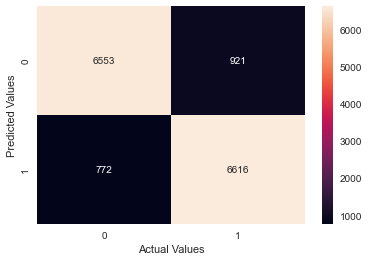

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7474
           1       0.88      0.90      0.89      7388

    accuracy                           0.89     14862
   macro avg       0.89      0.89      0.89     14862
weighted avg       0.89      0.89      0.89     14862



In [61]:
# confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(6,4))
plt.style.use("seaborn")
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("cm_randomF.jpg")
plt.show()
print(classification_report(y_test,y_pred_rf))

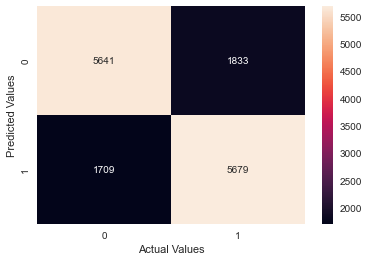

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      7474
           1       0.76      0.77      0.76      7388

    accuracy                           0.76     14862
   macro avg       0.76      0.76      0.76     14862
weighted avg       0.76      0.76      0.76     14862



In [55]:
# confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,y_pred_logR)

plt.figure(figsize=(6,4))
plt.style.use("seaborn")
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
print(classification_report(y_test,y_pred_logR))

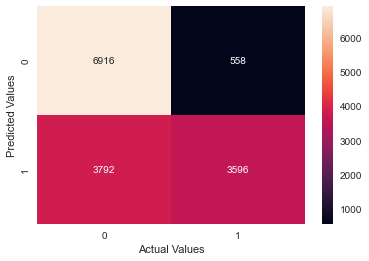

              precision    recall  f1-score   support

           0       0.65      0.93      0.76      7474
           1       0.87      0.49      0.62      7388

    accuracy                           0.71     14862
   macro avg       0.76      0.71      0.69     14862
weighted avg       0.76      0.71      0.69     14862



In [56]:
# confusion matrix for naive Bayes Classifier
cm = confusion_matrix(y_test,y_pred_NB)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
print(classification_report(y_test,y_pred_NB))

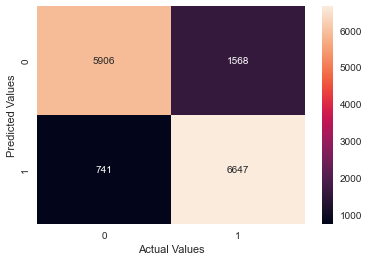

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      7474
           1       0.81      0.90      0.85      7388

    accuracy                           0.84     14862
   macro avg       0.85      0.84      0.84     14862
weighted avg       0.85      0.84      0.84     14862



In [62]:
# confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("cm_KNN.jpg")
plt.show()
print(classification_report(y_test,y_pred_knn))

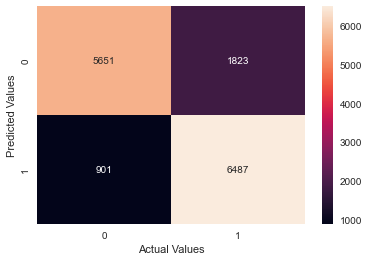

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      7474
           1       0.78      0.88      0.83      7388

    accuracy                           0.82     14862
   macro avg       0.82      0.82      0.82     14862
weighted avg       0.82      0.82      0.82     14862



In [58]:
# confusion matrix for Support vector Classifier
cm = confusion_matrix(y_test,y_pred_svc)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
print(classification_report(y_test,y_pred_svc))

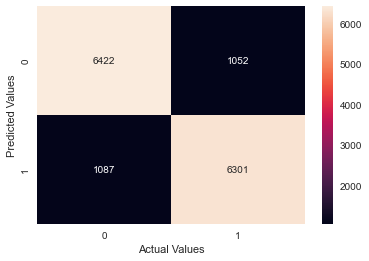

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7474
           1       0.86      0.85      0.85      7388

    accuracy                           0.86     14862
   macro avg       0.86      0.86      0.86     14862
weighted avg       0.86      0.86      0.86     14862



In [59]:
# confusion matrix for Decision Tree Classifier
cm = confusion_matrix(y_test,y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
print(classification_report(y_test,y_pred_dt))

## Conclusion:
#### Our prediction task was to determine whether a person makes over 50K a year or not. After doing thorough analysis of the dataset we have gainend below observations and results:
1. We gained the below valuable insights from the data by doing different types of analysis:
    1. Most of the occurances in the dataset are white males aged between 20-40, high school graduates with around 8 - 10 years of experience and working for around 40 hours per week.
    2. Around 67% male and 33% female.
    3. The data needs to be sampled as the dataset is unbalanced. ie; since 76% data belongs to '<=50K' class and only 24% belongs to '>50K'
2. Here, we have preprocessed, scaled and sampled the data then trained 6 different machine learing models.
3. Random Forest Classifier is the best performing model amonsgt all the models trained and tested with the below scores:
   Accuracy Score: 88.45%
   Recall Score: 89.04%
   F1 Score: 88.52% 
